# **5. 분류와 군집화로 이해하는 지도 학습과 비지도 학습**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---


### **5장 미니 프로젝트 A1** - 잡음제거: k-NN의 활용



In [12]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다
from skimage.io import imread_collection

In [13]:
url = 'https://github.com/dknife/ML2nd/raw/main/data/Proj1/40/'  # 이미지 데이터 위치

images = []
for i in range(1, 41):  # img01 ~ img40
    file = f'{url}img{i:02d}.jpg'
    try:
        img = imread(file)
        img = resize(img, (24, 24, 3), anti_aliasing=True)
        images.append(img)
    except Exception as e:
        print(f"Error loading img{i:02d}.jpg: {e}")

print(f"Total images loaded: {len(images)}")
images = np.array(images)
print("Final shape:", images.shape)  # (40, 24, 24, 3) 나와야 함!

Total images loaded: 40
Final shape: (40, 24, 24, 3)


In [5]:
def plot_images(nRow, nCol, imgs):
    fig, axes = plt.subplots(nRow, nCol, figsize=(nCol, nRow))
    axes = axes.flatten() if nRow > 1 else axes  # 1행일 때도 통일

    for i in range(nRow * nCol):
        if i < len(imgs):
            axes[i].imshow(imgs[i])
        axes[i].axis('off')  # 그림만 보이게 함

    plt.tight_layout()
    plt.show()

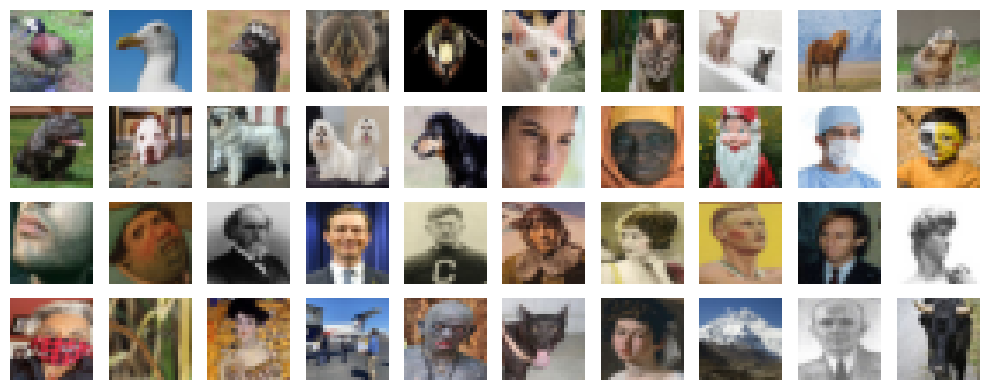

In [6]:
plot_images(4, 10, images)

훈련용 데이터


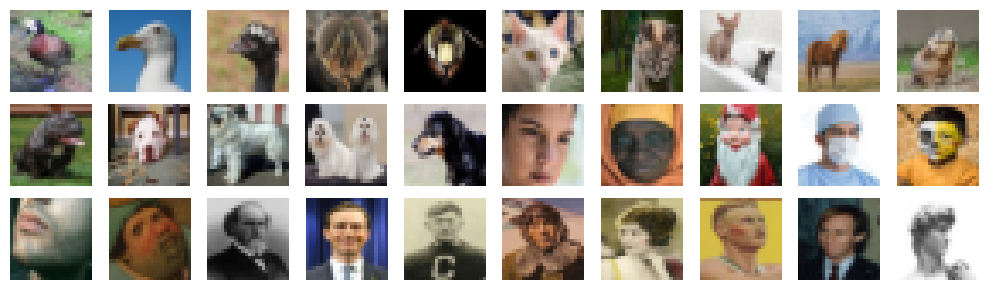

검증용 데이터


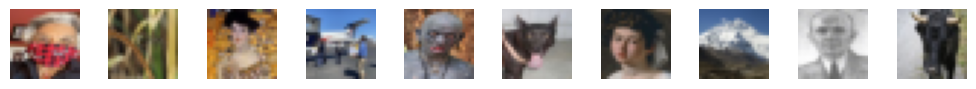

In [7]:
X = np.array(images[:30])
X_test = np.array(images[30:])
print('훈련용 데이터')
plot_images(3, 10, X)
print('검증용 데이터')
plot_images(1, 10, X_test)

In [8]:
imgR, imgC, channel = 24, 24, 3
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.1
X_noisy = np.clip(X_noisy, 0, 1)
X_test_noisy =  X_test+ np.random.randn(len(X_test),imgR,imgC,channel)*0.1
X_test_noisy = np.clip(X_test_noisy, 0, 1)

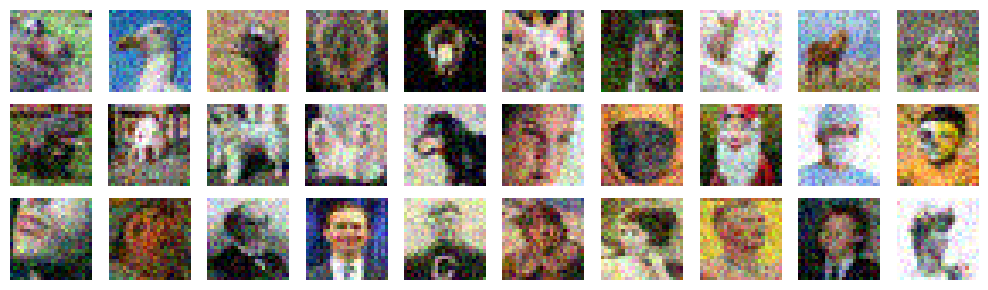

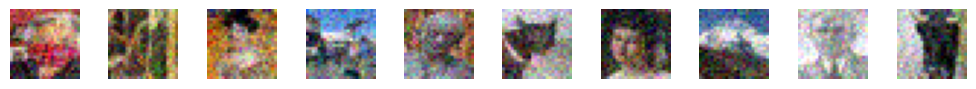

In [9]:
plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

In [10]:
X_noisy_flat = X_noisy.reshape(-1, imgR*imgC*channel)
X_flat = np.array(X.reshape(-1, imgR*imgC*channel) * 255, dtype=np.uint)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_noisy_flat, X_flat)

KNeighborsClassifier()

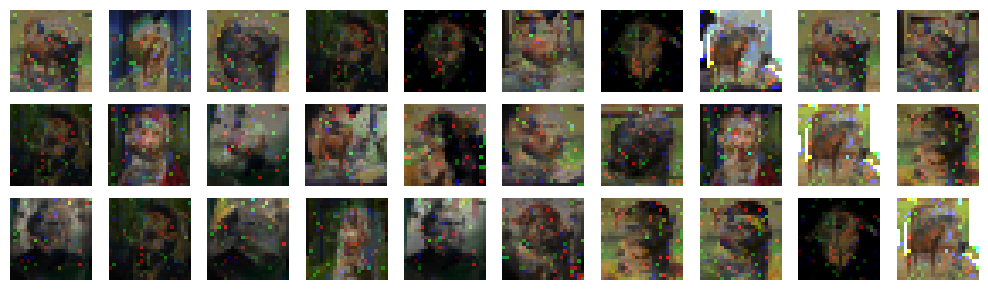

In [ ]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3, 10, denoised_result)

In [ ]:
n_augmentation = 100
X_noisy_aug = X + np.random.randn(len(X), imgR, imgC, channel) * 0.2
y_label = np.array(X * 255, dtype = np.uint)
y = y_label

print(X_noisy.shape)
for i in range(n_augmentation):
    noisy_data = X + np.random.randn(len(X), imgR, imgC, channel) * 0.2
    X_noisy_aug = np.append(X_noisy_aug, noisy_data, axis=0)
    y = np.append(y, y_label, axis = 0)

X_noisy_aug = np.clip(X_noisy_aug, 0, 1)
X_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))

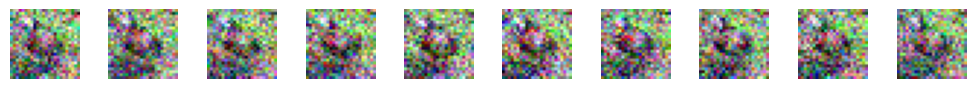

In [ ]:
plot_images(1, 10, X_noisy_aug[0:300:30])

In [ ]:
X_noisy_aug_flat = X_noisy_aug.reshape(-1, imgR*imgC*channel)
y_flat = y.reshape(-1, imgR*imgC*channel)

knn.fit(X_noisy_aug_flat, y_flat)

KNeighborsClassifier()

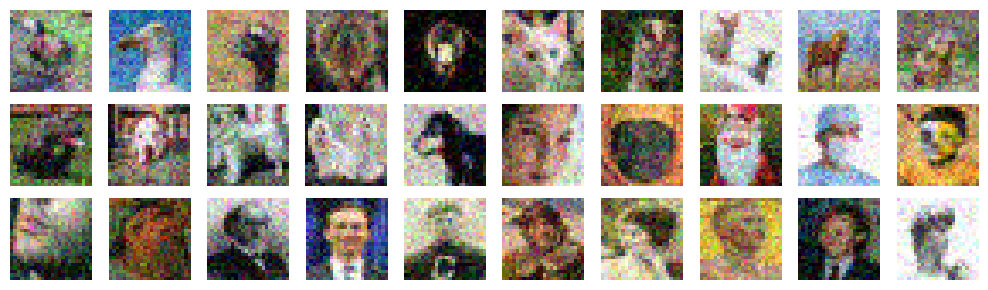

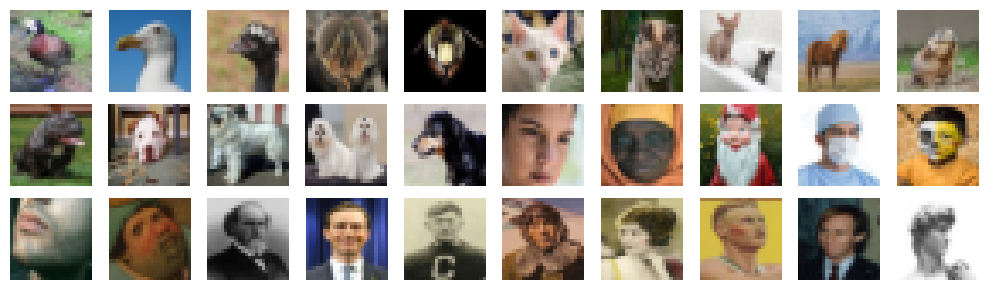

In [ ]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)

plot_images(3, 10, X_noisy)
plot_images(3, 10, denoised_result)

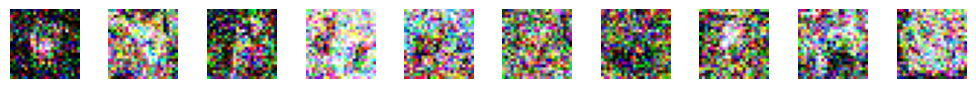

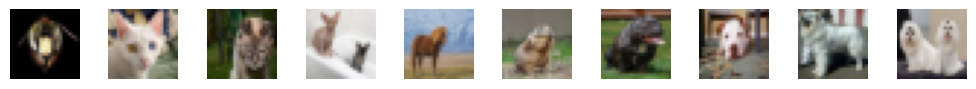

In [ ]:
rndidx = np.random.randint(0, 20)
data = X[rndidx:rndidx+10] + np.random.randn(10, imgR, imgC, channel)*0.4
data = np.clip(data, 0, 1)
data_flat = data.reshape(-1, imgR*imgC*channel)

denoised = knn.predict(data_flat)
denoised = denoised.reshape(-1, imgR, imgC, channel)
denoised = np.clip(denoised, 0, 255)

plot_images(1, 10, data)
plot_images(1, 10, denoised)

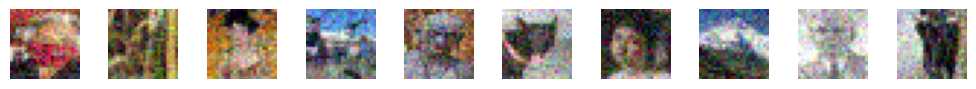

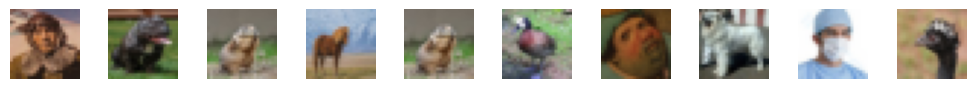

In [ ]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)

In [ ]:
### 이미지 데이터 증강 ####
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # 변경

image_generator = ImageDataGenerator(
    rotation_range=360,        # 360도 회전
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,      # 좌우반전
    vertical_flip=True         # 상하반전
)

print("ImageDataGenerator 준비 완료!")

ImageDataGenerator 준비 완료!


In [ ]:
# 500번 증강 (정답 + 잡음 입력)
n_augmentation = 500
n_images = len(X)

augmented = [next(image_generator.flow(X, batch_size=n_images))
                                for _ in range(n_augmentation)]
X_aug = np.clip(np.concatenate(augmented)
        + np.random.randn(n_images * n_augmentation,24,24,3)*0.12, 0, 1)
y_aug = (np.concatenate(augmented) * 255).astype(np.uint8)

print("증강 완료! ", X_aug.shape, y_aug.shape)

증강 완료!  (15000, 24, 24, 3) (15000, 24, 24, 3)


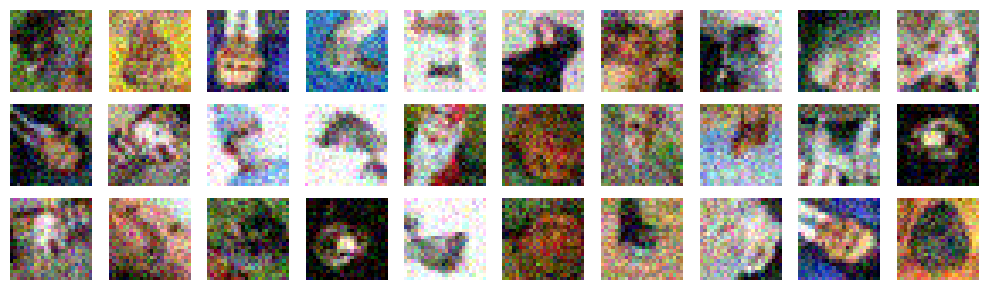

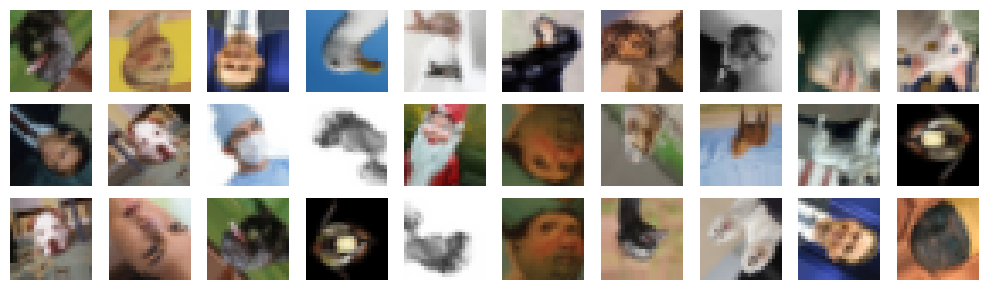

In [ ]:
X_aug = np.clip(X_aug, 0, 1)
y_aug = np.clip(y_aug, 0,255)

plot_images(3, 10, X_aug[100:])
plot_images(3, 10, y_aug[100:])

In [ ]:
X_aug_flat = X_aug.reshape(-1, imgR*imgC*channel)
y_aug_flat = y_aug.reshape(-1, imgR*imgC*channel)
knn.fit(X_aug_flat, y_aug_flat)

KNeighborsClassifier()

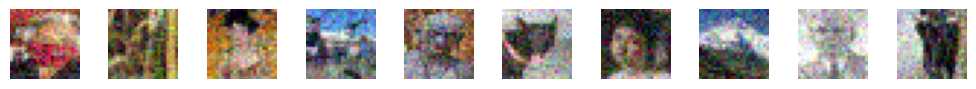

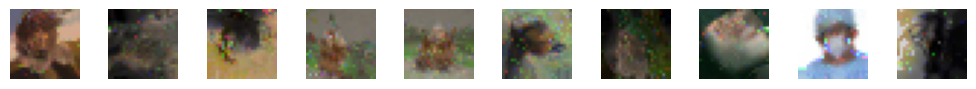

In [ ]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised)